In [1]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import altair as alt
alt.renderers.enable('notebook') # enable altair rendering
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
import matplotlib
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
listings_df = pd.read_csv('./data/with_amenities_and_estimated_income.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Get column names
listings_df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       ...
       'Alfresco bathtub', 'Safety card', 'Cooking basics',
       'Flat path to front door', 'Free street parking',
       'Lock on bedroom door', 'Lake access', 'Jetted tub', 'Cat(s)',
       'estimated_income_per_month'],
      dtype='object', length=279)

In [31]:
# Group by neighborhood to see if some areas have more listings than others
counts_of_listings = listings_df['neighbourhood_group_cleansed'].value_counts()



In [43]:
# Get the counts of listings into a dataframe
counts_of_listings_df = pd.DataFrame(data=counts_of_listings)

neighborhoods = counts_of_listings_df.index.values
counts = counts_of_listings_df['neighbourhood_group_cleansed'].values


counts_of_listings_df = pd.DataFrame({'neighborhood':neighborhoods, 'count':counts})


## How many listings are within each neighborhood?

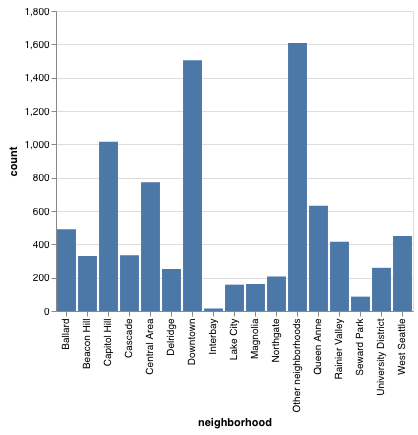

In [48]:
alt.Chart(counts_of_listings_df).mark_bar().encode(
    x='neighborhood',
    y='count'
)

## What does estimated monthly income look like between neighborhoods?

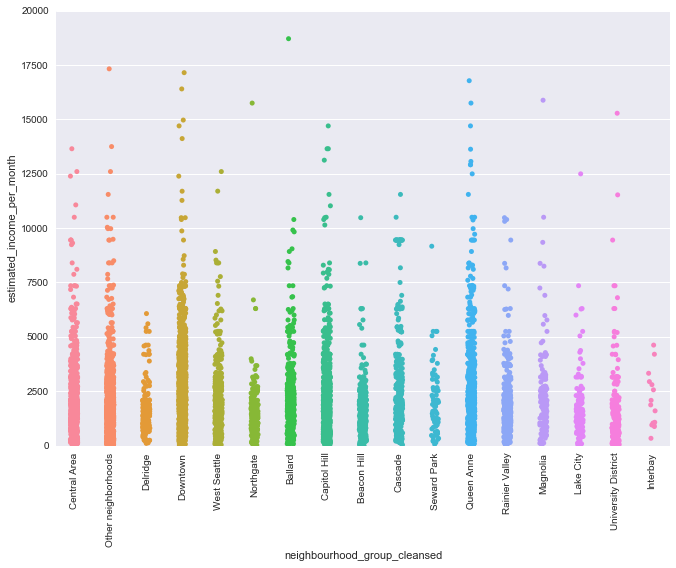

In [76]:
ax = sns.stripplot(x="neighbourhood_group_cleansed", y="estimated_income_per_month", jitter=True, data=listings_df)
ax.set(ylim=(0,20000))
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(11,8)})
plt.show()

## How does average monthly income differ between property types?

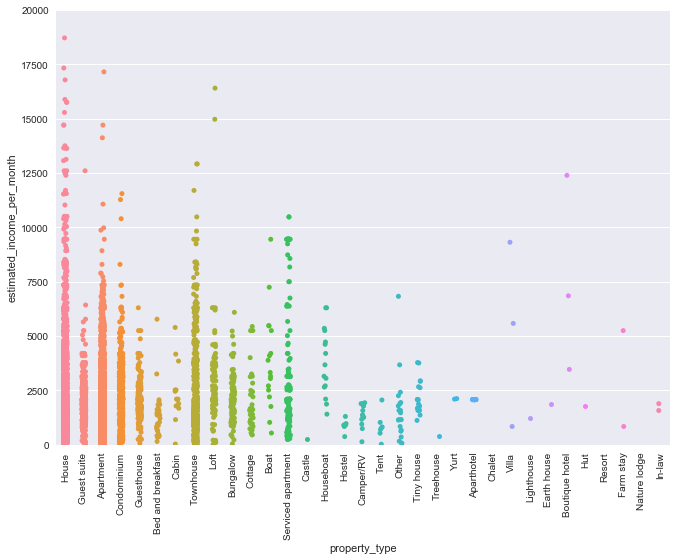

In [77]:
ax = sns.stripplot(x="property_type", y="estimated_income_per_month", jitter=True, data=listings_df)
ax.set(ylim=(0,20000))
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(11,8)})
plt.show()

## Does the rating of the listing impact the monthly income?

[(0, 20000)]

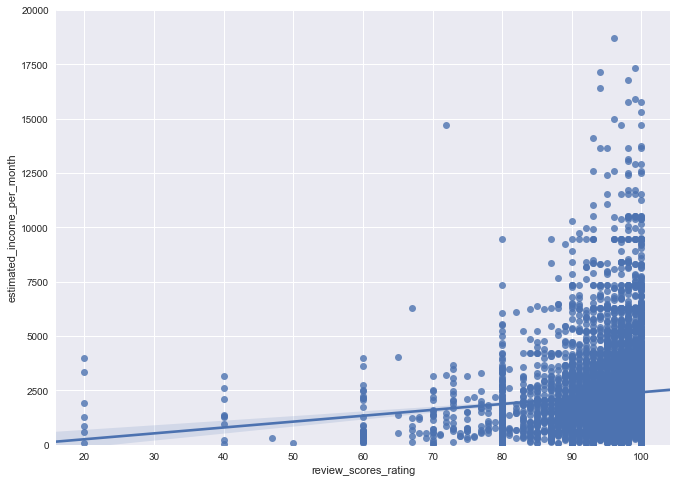

In [78]:
ax = sns.regplot(x="review_scores_rating", y="estimated_income_per_month", data=listings_df)
ax.set(ylim=(0,20000))